# Clustering with ipython

You may work with other members of the course if you like. This practical is not assessed although some of the skills will be required for your practical project next week. If you are stuck at any stage please ask a demonstrator.

Dominic Waithe 2015 (c)

In [52]:
#This line is very important: (It turns on inline the visuals!)
%pylab inline
import csv

#You will need these also. These functions extract the data from the results file.
def load_file_return_data(filepath):
    data =[]
    with open(filepath,'r') as f:
        reader=csv.reader(f,delimiter='\t')
        headers = reader.next()
        for line in reader:
            data.append(line)

    name_list = list(enumerate(headers))
    return data, name_list
def return_data_with_header(header,data,name_list):
    for idx, name in name_list:
        if name == header:
            ind_to_take = idx
    data_col = []
    for line in data:
        
        data_col.append(float(line[ind_to_take]))
    return np.array(data_col)

Populating the interactive namespace from numpy and matplotlib


## Reading the data from the Results.txt

The first stage is to read your Fiji exported data into python.

In [53]:
#You insert the local path where your exported imageJ 
#where 'Results.txt' is currently written.

data,name_list = load_file_return_data('Results.txt')
print name_list
#Insert the header you wish to extract here:
header1 = 'Area'
data_col1 = return_data_with_header(header1,data,name_list)
#Insert the header you wish to extract here:
header2 = 'Mean'
data_col2 = return_data_with_header(header2,data,name_list)

[(0, ' '), (1, 'Area'), (2, 'Mean'), (3, 'StdDev'), (4, 'Mode'), (5, 'Min'), (6, 'Max'), (7, 'IntDen'), (8, 'Median'), (9, 'RawIntDen')]


## Plotting the data 

It is always handy to plot relationships

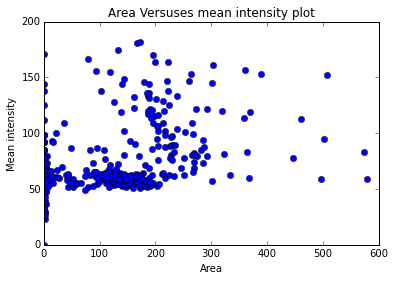

In [106]:
plot(data_col1,data_col2, 'o')
title('Area Versuses mean intensity plot')
xlabel('Area')
ylabel('Mean intensity')

## Looking for clusters in the data.

Is there structure in the data we can utilise to isolate cells further? We want to use the intensity of the cells and their area to further isolate the cells which we segmented.


In [101]:
#To cluster the data we start by using the kmeans algorithm.
from sklearn.cluster import KMeans,SpectralClustering 
#We initialise a kmeans model in the variable kmeans:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto')
#For more information.
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [102]:
#Now we reorganise the data to a format which is compatible with kmeans algorithm.
data_arr = np.zeros((data_col2.__len__(),2))
data_arr[:,0] = np.array(data_col1)
data_arr[:,1] = np.array(data_col2)
#Now we use this data to fit the kmeans model in an unsupervised fashion.
kmeans.fit(data_arr)
out = kmeans.predict(data_arr)

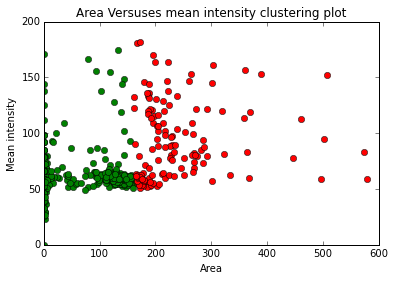

In [105]:
#Now we fit the two clusters we have tried to find
plot(data_col1[out == 1],data_col2[out ==1], 'go')
plot(data_col1[out == 0],data_col2[out ==0], 'ro')

title('Area Versuses mean intensity clustering plot')
xlabel('Area')
ylabel('Mean intensity')
#The clustering algorithm should have highlighted good proportion
#of the cells which are both large and green. These represent the
#Dendritic cells in the image.

## Special Challenge - optional

Try and visualise which of your cells is which in the original image. This will involve importing the image and highlighting those areas close to the 'X' and 'Y' coordinates in the saved 'results' table. How did the kmeans perform. There are plenty of clustering algorithms in the sklearn library take a look and see if you can improve the classification.
http://scikit-learn.org/stable/modules/clustering.html